In [87]:
import pandas as pd #Manipulation des tableaux des données
import numpy as np #Calcul Scientifique
import matplotlib.pyplot as plt #Visualisation graphique
import seaborn as sns #Manipulation et visualisation statistique

In [88]:
import warnings #importation de module warnings
warnings.filterwarnings ("ignore")#ignorer les alertes

In [89]:
# Read a CSV file named "stroke_data.csv" using the pandas library's `read_csv` function
# and assign the resulting dataframe object to the variable `data`.
data = pd.read_csv('50_Startups.csv', sep=",")

In [90]:
data.shape #Printing rows and columns

(50, 5)

In [91]:
data.info() # Print a summary of the dataframe data, including the column names, non-null counts, and data types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [92]:
data.head() #Print the first 5 experiences

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [93]:
data.describe() #Describing the dataset (count,mean,std(ecart-type),min,q1,q2,q3,max)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [94]:
data.describe(include='object') #top: akthar valeur mawjouda #freq: valeur top kadeh mawjouda
#unique: kadeh men valeur categorique mawjouda

,State
count,50
unique,3
top,New York
freq,17


In [95]:
data.isnull().sum()# Return the sum of null values in each column of the dataframe data.

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

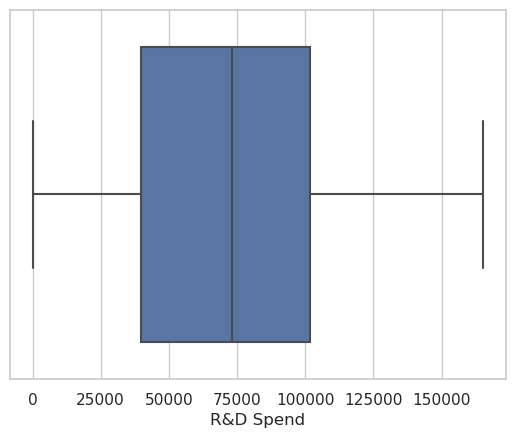

In [96]:
sns.set(style='whitegrid')
sns.boxplot(data['R&D Spend'], orient='h') # Create a horizontal box plot of the 'bmi' column of the dataframe `data` using the seaborn library.
plt.show() # Display the plot.

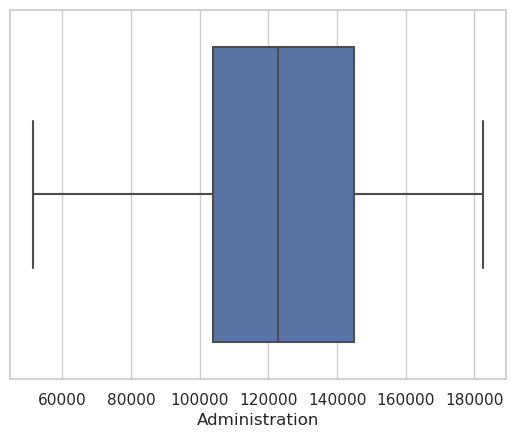

In [97]:
sns.set(style='whitegrid')
sns.boxplot(data['Administration'], orient='h') # Create a horizontal box plot of the 'bmi' column of the dataframe `data` using the seaborn library.
plt.show() # Display the plot.

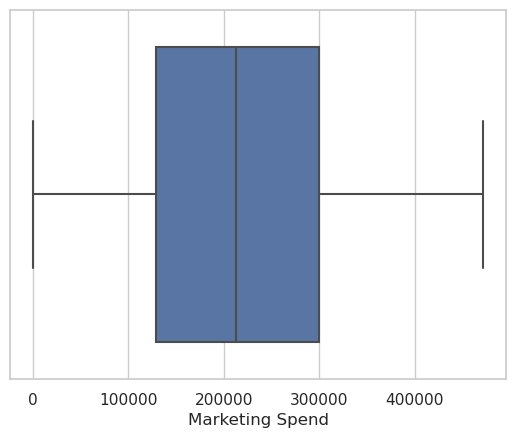

In [98]:
sns.set(style='whitegrid')
sns.boxplot(data['Marketing Spend'], orient='h') # Create a horizontal box plot of the 'bmi' column of the dataframe `data` using the seaborn library.
plt.show() # Display the plot.

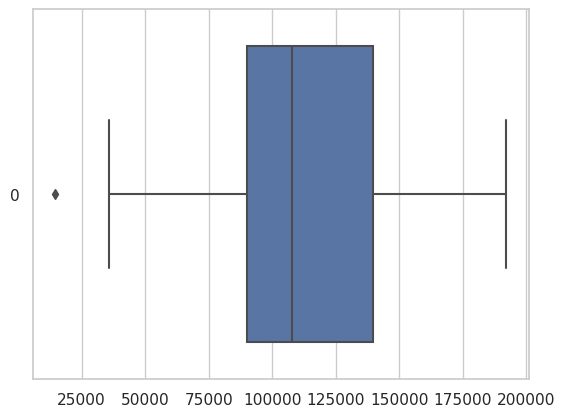

In [99]:
sns.set(style='whitegrid')
sns.boxplot(data=data['Profit'], orient='h') # Create a horizontal box plot of all columns in the dataframe `data` using the seaborn library.
plt.show() # Display the plot.

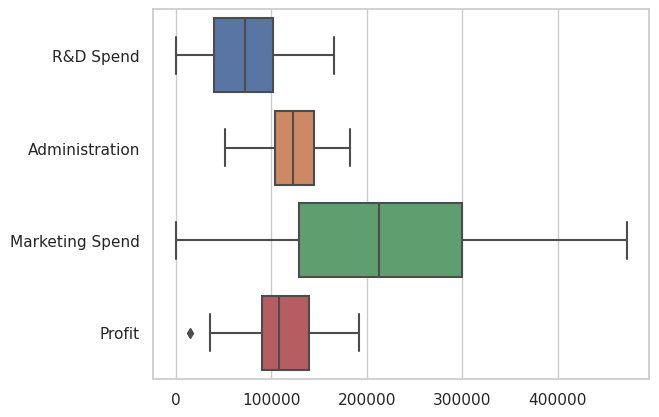

In [100]:
sns.set(style='whitegrid')
sns.boxplot(data=data, orient='h') # Create a horizontal box plot of all columns in the dataframe `data` using the seaborn library.
plt.show() # Display the plot.

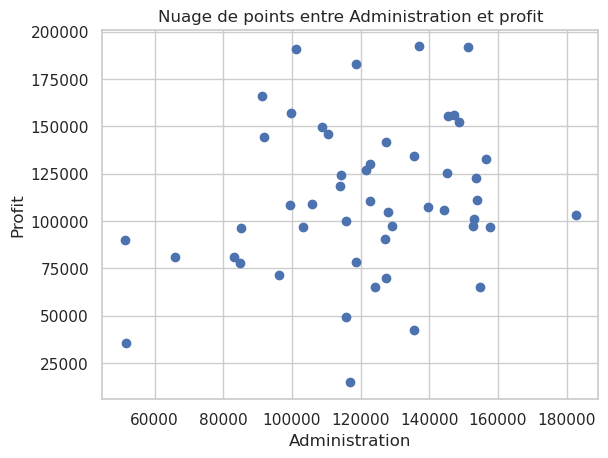

In [101]:
# Create scatter plot
plt.scatter(data['Administration'], data['Profit'])

# Add labels and title
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Nuage de points entre Administration et profit')

# Show the plot
plt.show()

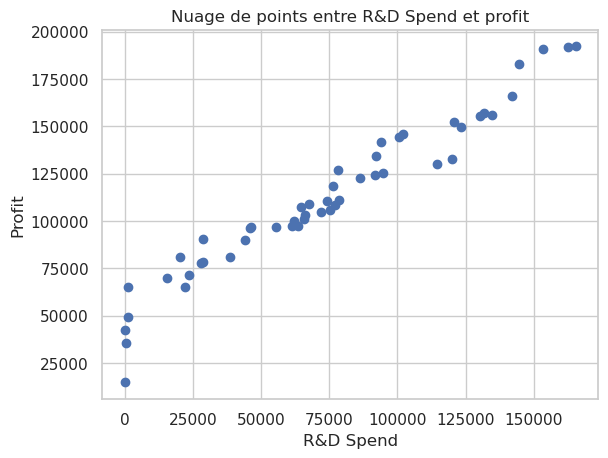

In [102]:
# Create scatter plot
plt.scatter(data['R&D Spend'], data['Profit'])

# Add labels and title
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Nuage de points entre R&D Spend et profit')

# Show the plot
plt.show()

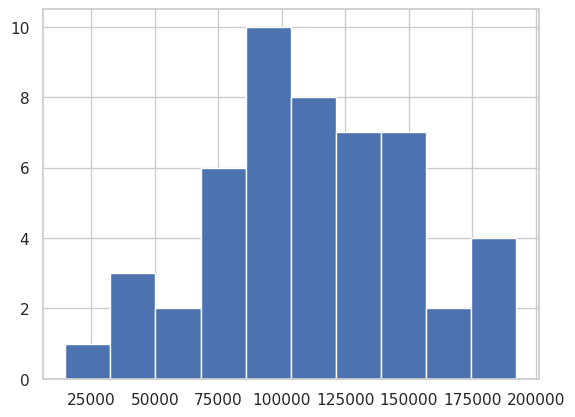

In [103]:
plt.hist(data.Profit) # Create a histogram of the 'Profit' column in the normalized dataframe `data` using the matplotlib library.
plt.show() # Display the plot.

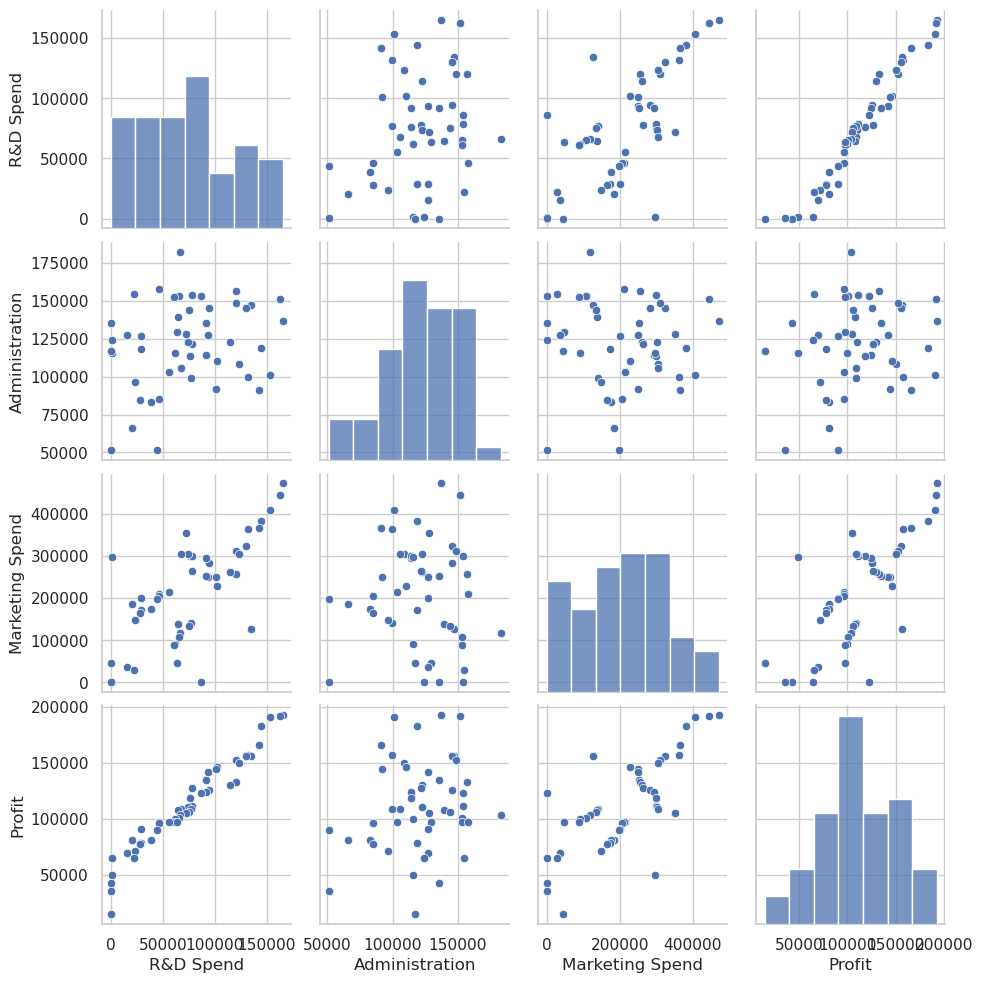

In [104]:
# Create a pair plot of the dataset
sns.pairplot(data)

# Show the plot
plt.show()

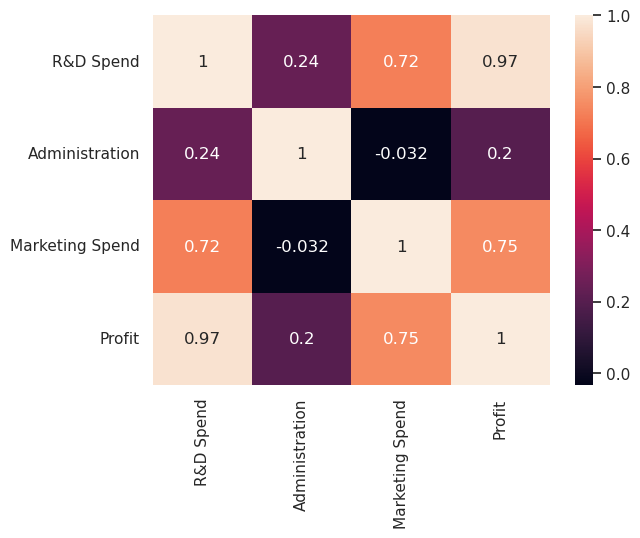

In [105]:
corr_matrix = data.corr(method="pearson")
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [106]:
from sklearn.preprocessing import LabelEncoder # Import the LabelEncoder class from the scikit-learn library.
Label = LabelEncoder() # Create an instance of the LabelEncoder class and assign it to the variable `Label`.

x= data.iloc[:,0:4] # Select the first 4 columns of the dataframe `data` and assign them to the variable `x`.
                     #On NE va pas prendre la 11ème colonne (si on compte à partir de 1) c'est à dire la colonne numéro 4
                     #tableau de données qui contient features
y = data.iloc[:,4] # Select the 5th column of the dataframe `data` and assign it to the variable `y`.
#Série

X=x.values #matrice
Y=y.values #vecteur
X[:,3]=Label.fit_transform(X[:,3])
X[0:5,:] # This code prints the first 5 rows of the feature matrix X.

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1]], dtype=object)

In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# This code creates a ColumnTransformer object that encodes the 'State' column with OneHotEncoder and passes through the remaining columns as is.
ct = ColumnTransformer([('State', OneHotEncoder(), [3])], remainder='passthrough')

X=ct.fit_transform(X)  # Apply one-hot encoding to the 'State' column in X.

X=X[:,1:]

In [108]:
X.shape

(50, 5)

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [110]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler #StandardScaler
#scaler= StandardScaler()
scaler = MinMaxScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test) #utilse les données enregistrer dans fit (Min , Max)

In [111]:
X_train_sc[0:5,:]

array([[1.        , 0.        , 0.33561668, 0.48655174, 0.45494286],
       [0.        , 1.        , 0.2782839 , 0.3173015 , 0.43561799],
       [1.        , 0.        , 0.45557444, 0.87258866, 0.28413435],
       [0.        , 0.        , 0.2807759 , 1.        , 0.44680961],
       [1.        , 0.        , 0.55488118, 0.59103645, 0.62511553]])

In [112]:
X_train_sc.shape

(40, 5)

In [113]:
from sklearn.linear_model import LinearRegression

# Create a new instance of the LinearRegression class
regressor = LinearRegression()

# Fit the regression model to the training data
regressor.fit(X_train, y_train)

# Output the coefficients of the linear regression model
print("Coefficients de régression :", regressor.coef_)

# Output the intercept of the linear regression model
print("Ordonnée à l'origine :", regressor.intercept_)

Coefficients de régression : [-9.59284160e+02  6.99369053e+02  7.73467193e-01  3.28845975e-02
  3.66100259e-02]
Ordonnée à l'origine : 42554.16761772438


In [114]:
# Use the trained linear regression model to make predictions on the test data
y_pred = regressor.predict(X_test)

# Create a DataFrame to compare the predicted and actual values
df_pred_vs_actual = pd.DataFrame({'Valeurs réelles': y_test, 'Valeurs prédites': y_pred})

# Output the DataFrame
df_pred_vs_actual

,Valeurs réelles,Valeurs prédites
0,103282.38,103015.201598
1,144259.40,132582.277608
2,146121.95,132447.738452
3,77798.83,71976.098513
4,191050.39,178537.482211
5,105008.31,116161.242302
6,81229.06,67851.692097
7,97483.56,98791.733747
8,110352.25,113969.435330
9,166187.94,167921.065696


In [115]:
print(data['Administration'].kurtosis())
print(data['Administration'].skew())


0.22507113536865386
-0.4890248099671768


In [116]:
print(data['Profit'].kurtosis())   #faible suit la loi normale 
print(data['Profit'].skew()) 


-0.06385888546853113
0.023291019769116614


In [117]:
y_test_pred=regressor.predict(X_test)



In [118]:
for i in range (10) :
    print(y_test_pred[i],y_test[i])

103015.20159796352 103282.38
132582.2776081537 144259.4
132447.73845174702 146121.95
71976.09851258088 77798.83
178537.48221055616 191050.39
116161.24230165542 105008.31
67851.69209675616 81229.06
98791.73374687255 97483.56
113969.43533012968 110352.25
167921.06569550867 166187.94


In [119]:
y_tain_predict=regressor.predict(X_train)


In [120]:
for i in range (40) :
    print(y_tain_predict[i],y_train[i])

95764.42320496312 96778.92
89164.62849777029 96479.51
109506.72329085595 105733.54
91366.21889410385 96712.8
127111.48666646355 124266.9
159019.04337114052 155752.6
148905.98812540772 132602.65
48179.60744028113 64926.08
45374.34722507569 35673.41
102951.95967979374 101004.64
145449.63178398856 129917.04
96684.71387298741 99937.59
97535.35761939806 97427.84
116571.15139254041 126992.93
69421.13311311325 71498.49
116212.62095132783 118474.03
60736.53267611497 69758.98
152787.95464277733 152211.77
127413.03373109878 134307.35
102210.16391826808 107404.34
161822.7226407004 156991.12
131583.61511490867 125370.37
75019.0916133686 78239.91
48054.9196939395 14681.4
189547.28196893138 191792.06
127528.9224842265 141585.52
85540.50570954054 89949.14
111255.82514049414 108552.04
156191.10124355304 156122.51
108464.25100331308 108733.99
75306.81185049293 90708.19
119915.3872675488 111313.02
115144.5891495439 122776.86
152688.90677959353 149759.96
81513.47163491356 81005.76
57298.2861301846 49490.

METRIC

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcul des métriques
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)
r22=r2_score(y_train,y_tain_predict)

# Affichage des résultats
print("MSE : ", mse)
print("MAE : ", mae)
print("RMSE : ", rmse)
print("R2 : ", r2)
print("R22 :",r22)

MSE :  83502864.03257468
MAE :  7514.293659640891
RMSE :  9137.990152794797
R2 :  0.9347068473282446
R22 : 0.9501847627493607


In [122]:
def rmse(targets,predictions):
    return np.sqrt(((predictions.targets)**2).mean())

In [123]:
Q1=data["Profit"].quantile(0.25) 
Q3=data["Profit"].quantile(0.75) 
IQR=Q3-Q1
Borne_sup=Q3+1.5*IQR
Borne_inf=Q1-1.5*IQR
Borne_inf=Q1-1.5*IQR
data=data[data['Profit']>=Borne_inf]
data=data[data['Profit']<=Borne_sup]

In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcul des métriques
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)
r22=r2_score(y_train,y_tain_predict)

# Affichage des résultats
print("MSE : ", mse)
print("MAE : ", mae)
print("RMSE : ", rmse)
print("R2 : ", r2)
print("R22 :",r22)

MSE :  83502864.03257468
MAE :  7514.293659640891
RMSE :  9137.990152794797
R2 :  0.9347068473282446
R22 : 0.9501847627493607


In [125]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [126]:
y_pred_r = ridge.predict(X_test)

In [127]:
ridge.intercept_

42580.96704352087

In [128]:
ridge.coef_

array([-8.55246577e+02,  6.60540602e+02,  7.73903697e-01,  3.25917542e-02,
        3.64400165e-02])

In [129]:
r2_score(y_pred_r,y_test)

0.92999812543972

In [130]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [131]:
y_pred_r = lasso.predict(X_test)

In [132]:
r2_score(y_pred_r,y_test)

0.9294075315664558